In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

## Генерация выборки
| Вид класса | random_state | cluster_std | noise | centers |
|:----------:|:------------:|:-----------:|:-----:|:-------:|
|    blobs   |      34      |      2.1      |   -   |    7    |

In [11]:
centers_count = 7
X, y = make_blobs(centers=7, random_state=34, cluster_std=2.1)

## Сгенерированная выборка

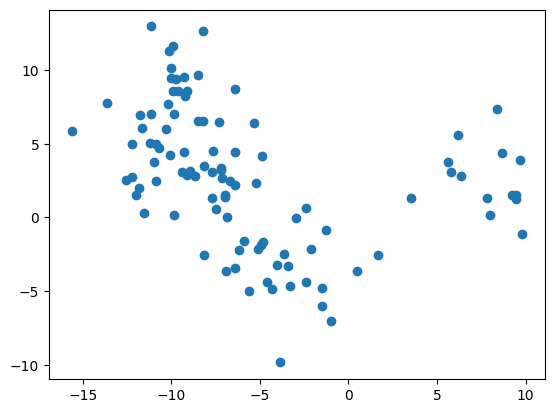

In [12]:
plt.scatter(X[:,0], X[:,1])

## Иерархическая класстеризация

In [13]:
def cluster_center(X, c):
    centers = np.zeros((centers_count,2))
    for i in range(1,8):
        ix = np.where(c == i)
        centers[i-1,:] = np.mean(X[ix,:], axis=1)
        
    return centers

In [14]:
mergings = linkage(X, method='single')
T = fcluster(mergings, centers_count, criterion='maxclust')
c = cluster_center(X, T)

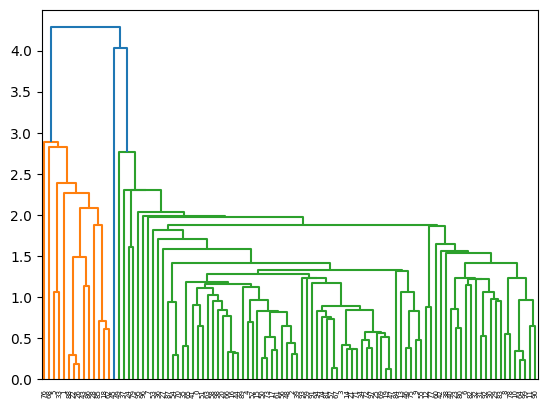

In [15]:
dendrogram(mergings)
plt.show()

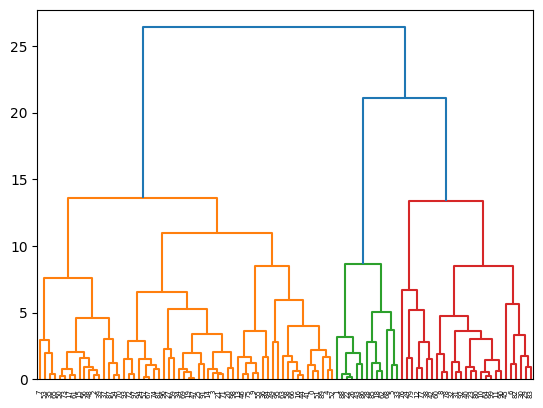

In [16]:
mergings = linkage(X, method='complete')
dendrogram(mergings)
plt.show()

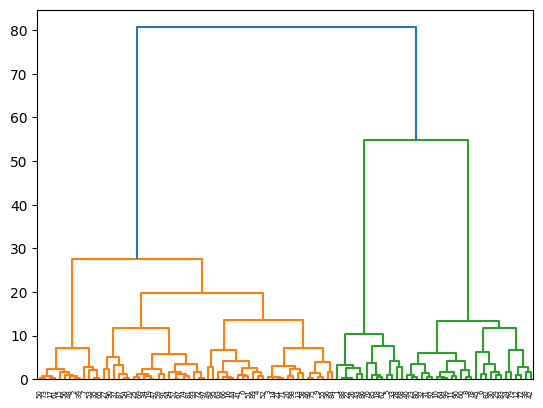

In [17]:
mergings = linkage(X, method='ward')
dendrogram(mergings)
plt.show()

## Лучшее разбиение

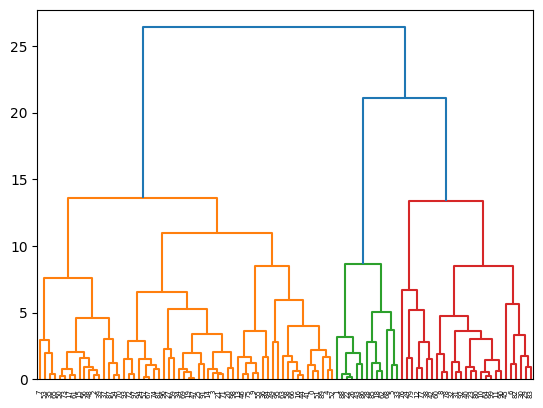

In [18]:
mergings = linkage(X, method='complete')
dendrogram(mergings)
plt.show()

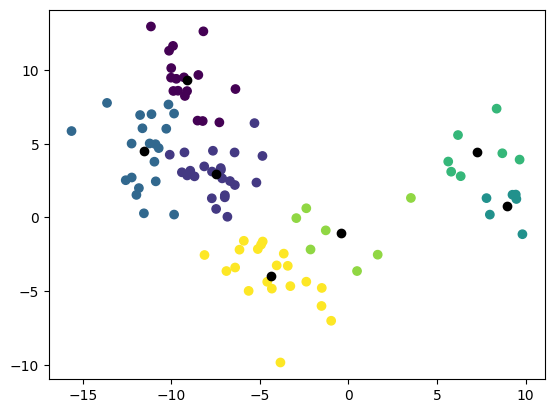

In [19]:
T = fcluster(mergings, centers_count, criterion='maxclust')
c = cluster_center(X, T)
plt.scatter(X[:,0], X[:,1], c=T)
plt.scatter(c[:,0], c[:,1], c='black')

In [20]:
from sklearn.metrics.pairwise import euclidean_distances

In [21]:
def sum_sq_dist(X, clust, cent):
    sums = np.zeros(centers_count)
    for i in range(1,centers_count+1):
        ix = np.where(clust == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i-1]])**2)
    return np.sum(sums) / centers_count

def sum_av_sq_dist(X, clust, cent):
    sums = np.zeros(centers_count)
    for i in range(1,centers_count+1):
        ix = np.where(clust == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i-1]])**2)/len(*X[ix,:])
    return np.sum(sums) / centers_count

def sum_cl_dist(cent):
    sums = np.sum(euclidean_distances(cent, cent))
    return sums / centers_count

In [22]:
sum_sq_dist(X, T, c)

79.38323581603677

In [23]:
sum_av_sq_dist(X, T, c)

5.279072498843499

In [24]:
sum_cl_dist(c)

70.75942095817022

## Метод k-средних

In [25]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import xticks

In [32]:
import warnings
warnings.filterwarnings("ignore")
clussters = []
dist = []
cent = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    clussters.append(kmeans.predict(X))
    cent.append(kmeans.cluster_centers_)
    dist.append(kmeans.inertia_ / k)

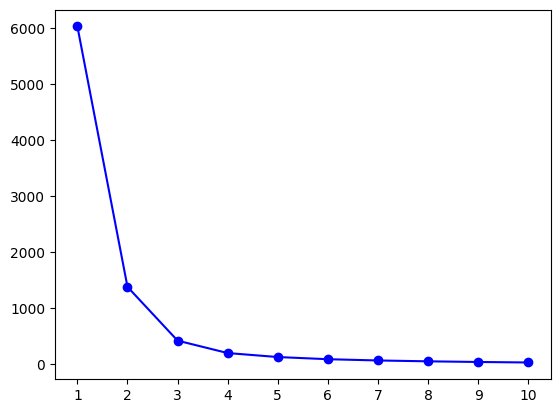

In [33]:
xticks(np.arange(1, 11, step=1)) 
plt.plot(range(1, 11), dist, '-bo')

In [34]:
metric = []
for k in range(10):
    sums = np.zeros(k)
    for i in range(k):
        ix = np.where(clussters[k] == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[k][i-1]])**2)/len(*X[ix,:])
    metric.append(np.sum(sums) / (k+1))

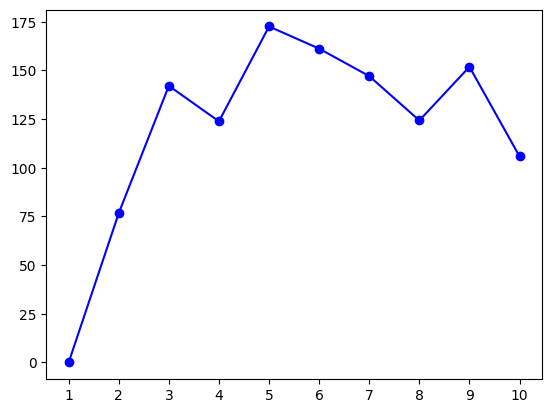

In [35]:
xticks(np.arange(1, 11, step=1)) 
plt.plot(range(1, 11), metric, '-bo')

In [36]:
metric = []
for k in range(10):
    sums = np.sum(euclidean_distances(cent[k], cent[k]))
    metric.append(sums / (k+1))

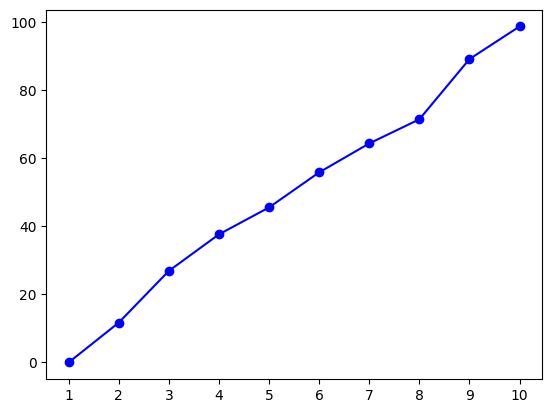

In [37]:
xticks(np.arange(1, 11, step=1)) 
plt.plot(range(1, 11), metric, '-bo')